In [1]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 1.3 MB/s 


In [2]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [3]:
app_ID = [
        'us.zoom.videomeetings',                  # Zoom
        'com.facebook.work',                      # Workplace  
        'com.google.android.apps.meetings',       # Google meet
        'com.cisco.webex.meetings',               # Cisco webex 
        'com.microsoft.teams',                    # Microsoft teams
        'com.vani.meeting',                       # Vani 
        'com.mirial.lifesizecloud',               # Lifesize                                  
        'appear.in.app',                          # Whereby
        'com.uberconference',                     # DialPad
        'com.gotomeeting',                        # GoToMeeting 
]
len(app_ID)

10

In [ ]:
app_infos = []

for ap in tqdm(app_ID):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 10/10 [00:02<00:00,  3.96it/s]


In [ ]:
def print_json(obj):
  json_str = json.dumps(
      obj,
      indent = 2,
      sort_keys=True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 and up",
  "appId": "us.zoom.videomeetings",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Stay connected wherever you go \u2013 start or join a secure meeting with flawless video and audio, instant screen sharing, and cross-platform instant messaging - for free! \r\n\r\nZoom is #1 in customer satisfaction and the best unified communication experience on mobile.\r\n\r\nIt's super easy! Install the free Zoom app, click on \"New Meeting,\" and invite up to 100 people to join you on video! Connect with anyone on Android based phones and tablets, other mobile devices, Windows, Mac, Zoom Rooms, H.323/SIP room systems, and telephones.\r\n\r\nVIDEO MEETINGS FROM ANYWHERE\r\n-Best  video meeting quality\r\n-Easily join a meeting or start an instant meeting with phone, email, or company contacts\r\n\r\nCOLLABORATE ON-THE-GO\r\n-Best

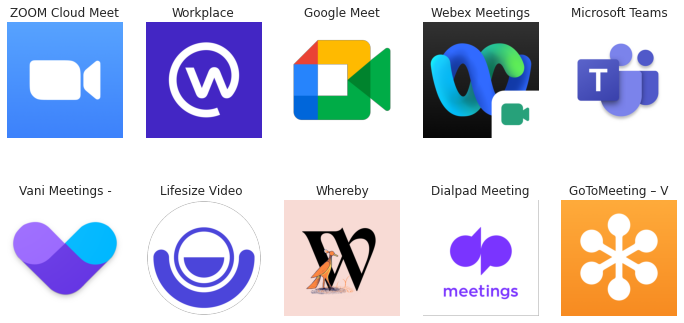

In [ ]:
fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(12, 6))

for i, ax in enumerate(axs.flatten()):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(ai['title'][:15])
  ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('/content/drive/MyDrive/Projects/Google_play_reviews_sentiment_analysis/Data/apps.csv', index=None, header=True)

In [ ]:
app_infos_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,similarApps,moreByDeveloper,appId,url
0,ZOOM Cloud Meetings,Stay connected wherever you go – start or join...,Stay connected wherever you go – start or join...,Zoom is a free HD meeting app with video and s...,Zoom is a free HD meeting app with video and s...,"500,000,000+",500000000,4.349674,3356601,49841,"[265631, 98896, 191673, 440246, 2360155]",0,True,USD,False,None,None,None,True,$14.99 - $149.99 per item,150M,5.0,5.0 and up,zoom.us,zoom.us,info@zoom.us,http://zoom.us,None,http://zoom.us/privacy/,8421529249358990421,Business,BUSINESS,https://play-lh.googleusercontent.com/JgU6AIRE...,https://play-lh.googleusercontent.com/3xA8F0tl...,[https://play-lh.googleusercontent.com/kSI2Fyh...,https://www.youtube.com/embed/BGH1y70zSkg?ps=p...,https://play-lh.googleusercontent.com/3xA8F0tl...,Everyone,None,None,False,"Jan 24, 2013",1640021063,5.8.6.3139,General features\r\n-Turkish and Polish langua...,General features<br>-Turkish and Polish langua...,False,"[com.microsoft.teams, com.skype.raider, com.mi...","[us.zoom.pwa.twa, us.zoom.zrc, us.zoom.videome...",us.zoom.videomeetings,https://play.google.com/store/apps/details?id=...
1,Workplace,We believe organisations work best when everyo...,We believe organisations work best when everyo...,Share information with your company using tool...,Share information with your company using tool...,"10,000,000+",10000000,4.713034,161682,1759,"[4770, 1578, 3529, 15411, 136394]",0,True,USD,False,None,None,None,False,None,Varies with device,Varies,Varies with device,"Meta Platforms, Inc.","Meta+Platforms,+Inc.",android-support@fb.com,http://www.workplace.com,"1 Hacker Way\nMenlo Park, CA 94025",https://www.facebook.com/legal/FB_Work_Privacy,5629993546372213086,Business,BUSINESS,https://play-lh.googleusercontent.com/Vd8nWYso...,https://play-lh.googleusercontent.com/vNthkJ07...,[https://play-lh.googleusercontent.com/Imq14s2...,None,None,Teen,None,None,False,"Jan 14, 2015",1639578010,348.0.0.39.118,None,None,False,"[com.facebook.workchat, com.facebook.adsmanage...","[com.facebook.orca, com.facebook.katana, com.f...",com.facebook.work,https://play.google.com/store/apps/details?id=...
2,Google Meet,"Securely connect, collaborate, and celebrate f...","Securely connect, collaborate, and celebrate f...",Get your team connected to secure video confer...,Get your team connected to secure video confer...,"100,000,000+",100000000,4.018829,1966278,9848,"[309494, 63004, 133629, 234855, 1225296]",0,True,USD,False,None,None,None,False,None,Varies with device,Varies,Varies with device,Google LLC,5700313618786177705,apps-help@google.com,https://support.google.com/a/answer/7126817,"1600 Amphitheatre Parkway, Mountain View 94043",http://www.google.com/policies/privacy,5700313618786177705,Business,BUSINESS,https://play-lh.googleusercontent.com/GBYSf20o...,https://play-lh.googleusercontent.com/yPqfLCnq...,[https://play-lh.googleusercontent.com/i892zh2...,None,None,Everyone,None,None,False,"Mar 9, 2017",1639609286,Varies with device,• Improved support for 250 person meetings\r\n...,• Improved support for 250 person meetings<br>...,False,"[us.zoom.videomeetings, com.microsoft.teams, c...",None,com.google.android.apps.meetings,https://play.google.com/store/apps/details?id=...
3,Webex Meetings,Don’t let being away from the office slow your...,Don’t let being away from the office slow your...,"Tap into a Webex meeting, wherever you are, wi...","Tap into a Webex meeting, wherever you are, wi...","50,000,00

In [4]:
app_reviews = []

for ap in tqdm(app_ID):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 1000 if score == 3 else 500,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 10/10 [01:49<00:00, 10.99s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "us.zoom.videomeetings",
  "at": "2021-12-21 00:02:44",
  "content": "This zoom app won't let me use my phone while on zoom conference and it turns my video camera off & mutes me when I'm in breakout room. People can't hear me on zoom when I try to use my phone. I really don't want to give this app Any stars but, in order to post this, I'm Forced to put a star.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "5.8.6.3139",
  "reviewId": "gp:AOqpTOFnERazHG7XwV8F0wcRC-vxSg2Qq8C8FrL1MwmBrZz_aH26XEWv6c6rlv6CXsfmET14OHafnRekDg9fSA",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 7,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14Gj03L5E4-Kj6ywVeX82XLuvPXn6Vi-D0f7utNkC",
  "userName": "Scot Loggan"
}



In [5]:
len(app_reviews)

40546

In [7]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('/content/drive/MyDrive/Projects/Google_play_reviews_sentiment_analysis/Data/reviews.csv', index=None, header=True)

In [8]:
app_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOFnERazHG7XwV8F0wcRC-vxSg2Qq8C8FrL1Mwm...,Scot Loggan,https://play-lh.googleusercontent.com/a-/AOh14...,This zoom app won't let me use my phone while ...,1,7,5.8.6.3139,2021-12-21 00:02:44,None,NaT,most_relevant,us.zoom.videomeetings
1,gp:AOqpTOEipEUWphaQC3txgZfyyNNxL0yz5PkMEznW1pw...,Dorian Elston,https://play-lh.googleusercontent.com/a/AATXAJ...,I dislike that others can seize the functions ...,1,12,5.8.6.3139,2021-12-16 03:29:39,None,NaT,most_relevant,us.zoom.videomeetings
2,gp:AOqpTOEEcIn6G873SQFu2V4sf1zd38DLsSF7KyNVa1v...,Daniel Vargas,https://play-lh.googleusercontent.com/a-/AOh14...,Locking portrait on phone settings does not wo...,1,4,5.8.6.3139,2021-12-21 02:26:32,None,NaT,most_relevant,us.zoom.videomeetings
3,gp:AOqpTOEj9flcSys5iBXkN2WAIZ17YaRxyT8wJTtmcIN...,Jackie Golds,https://play-lh.googleusercontent.com/a/AATXAJ...,I tried to do a zoom court meeting today and w...,1,16,5.8.6.3139,2021-12-08 19:20:37,None,NaT,most_relevant,us.zoom.videomeetings
4,gp:AOqpTOHTErqR2x3PFMM4sjYwA9uFDE-iMpDmhcBcc8q...,Frank Smo,https://play-lh.googleusercontent.com/a/AATXAJ...,Can never hear. I'm using on a galaxy S8 and v...,1,13,5.8.6.3139,2021-12-05 23:24:52,None,NaT,most_relevant,us.zoom.videomeetings
...,...,...,...,...,...,...,...,...,...,...,...,...
40541,gp:AOqpTOF_07tJfT9ZMr4rPq9ZWw5RhAN-cIQMqCOPuus...,Carowell Shelton,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome product.,5,0,4.7.3.1,2021-07-21 20:58:03,None,NaT,newest,com.gotomeeting
40542,gp:AOqpTOEHdAUXRZEBoI3KZKh4JfpZDlUMYDkOiwHOZae...,kavetivamsi krishna,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent,5,0,4.7.3.1,2021-07-21 15:14:07,None,NaT,newest,com.gotomeeting
40543,gp:AOqpTOEy2_xhfBhzVL0rBxtuc9ZMG327SnCxfpfWA0Q...,Tanish Tyagi,https://play-lh.googleusercontent.com/a-/AOh14...,Quality is very best,5,0,4.7.3.1,2021-07-21 10:55:53,None,NaT,newest,com.gotomeeting
40544,gp:AOqpTOGr9WG2GquLPq-nf0wR81oXcsuNw3KFhcwSesq...,Calivian Essential Paint,https://play-lh.googleusercontent.com/a-/AOh14...,Very good,5,0,None,2021-07-21 10:38:48,None,NaT,newest,com.gotomeeting
